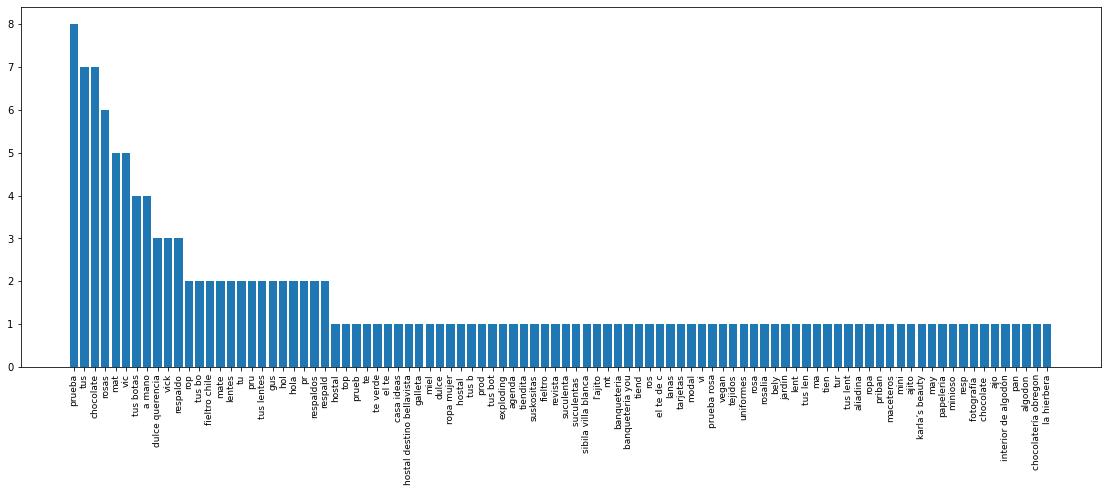

In [3]:
from app.methods.authorization import get_token
from datetime import datetime
from pprint import pprint
import matplotlib.pyplot as plt
import requests
import pickle

token = get_token()
queries_logs_url = "https://kong.aliad.as/action-logs/logs_query/products/queries"

headers = {
  "Authorization": token,
}
params = {
  "page": 0,
  "per_page": 1000,
}
response = ""
queries_dict = {}
while( response != [] ):
  response = requests.get(queries_logs_url, headers=headers, params=params).json()
  if isinstance(response, str): 
    print("auth error")
    exit(0) 
  for log in response:
    query_text = log['query'].lower()
    if len(query_text) > 1:
        if query_text not in queries_dict: 
          queries_dict[query_text] = 0
        queries_dict[query_text] += 1
  params["page"] += 1

queries_freq = sorted(queries_dict.items(), key= lambda item: item[1])
queries_freq.reverse()

queries = []
freqs = []

for query, freq in queries_freq:
    #if freq == 1: break
    queries.append(query)
    freqs.append(freq)

fig = plt.figure()
fig.set_size_inches(15, 5)
ax = fig.add_axes([0,0,1,1])

plt.xticks(rotation=90, size=9)

ax.bar(queries,freqs)
plt.show()

In [4]:
tokenSpree = "dec9c83c0a355bc48df9b0d53916eadf2de1c8cd489603b7"
url_vendors = "https://ecommerce-api.lc-ip81.inf.utfsm.cl/api/v1/vendors"

headers = {
    "Content-Type": "application/json",
    "X-Spree-Token": tokenSpree,
}
params = {
  "page": 1,
  "per_page": 1000,
}

response = ""
vendors_dict = {}

response = requests.get(url_vendors, headers=headers, params=params).json()
for vendor in response['vendors']:
    url_vendor_products = "https://ecommerce-api.lc-ip81.inf.utfsm.cl/api/v1/vendors/" + str(vendor['id']) + "/products"
    response = requests.get(url_vendor_products, headers=headers, params=params).json()
    vendors_dict[vendor['name']] = response['count']

C:\Users\crist\AppData\Roaming\Python\Python39\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 127793 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\crist\AppData\Roaming\Python\Python39\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 127851 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\crist\AppData\Roaming\Python\Python39\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 127793 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\crist\AppData\Roaming\Python\Python39\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 127851 missing from current font.
  font.set_text(s, 0, flags=flags)


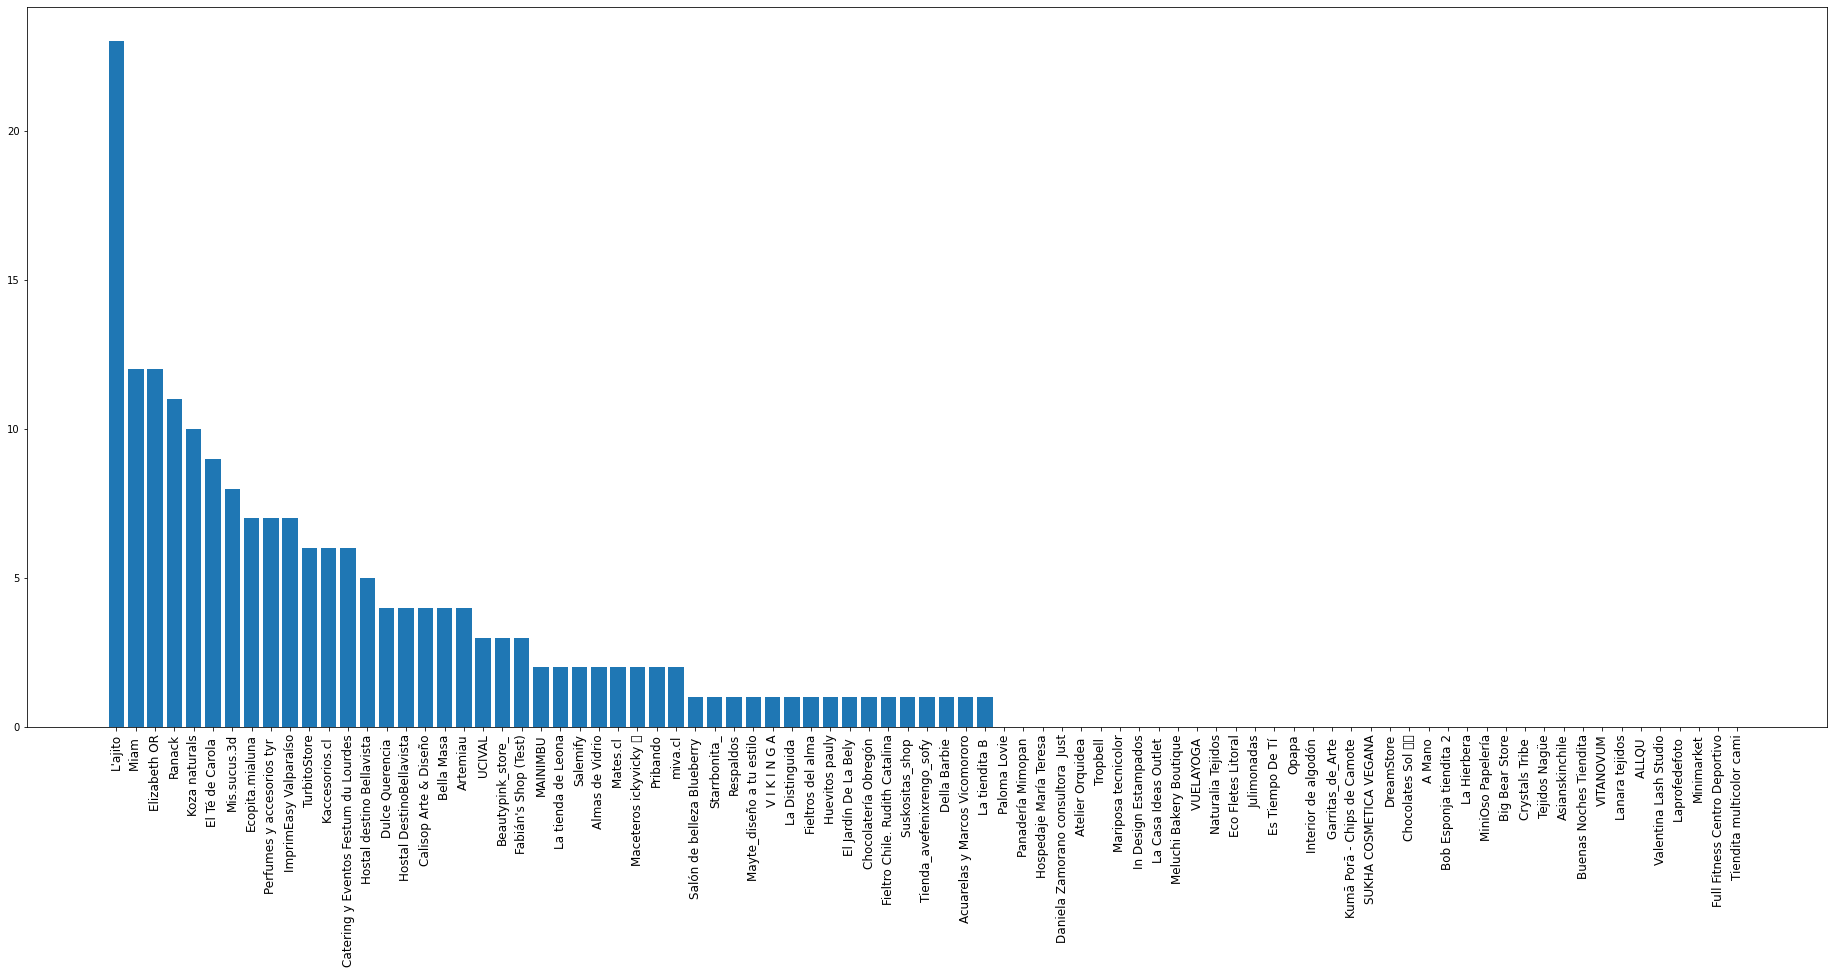

In [5]:
n_products = sorted(vendors_dict.items(), key= lambda item: item[1])
n_products.reverse()

vendors = []
products = []

for v, p in n_products:
    vendors.append(v)
    products.append(p)

fig = plt.figure()
fig.set_size_inches(25, 10)
ax = fig.add_axes([0,0,1,1])

plt.xticks(rotation=90, size=12)

ax.bar(vendors,products)
plt.show()

In [6]:
total_vendors = len(vendors)
total_products = sum(products)
zero_products_vendors = 0
products_vendors_1_5 = 0
products_vendors_6_10 = 0
products_vendors_11_more = 0

for n in products:
    if n == 0: zero_products_vendors += 1
    elif n < 6: products_vendors_1_5 += 1
    elif n < 11: products_vendors_6_10 += 1
    else: products_vendors_11_more += 1

today = datetime.now()
print(
    f"{'Data date: '}{today}\n\n"
    f"{'Total vendors:':<25}{total_vendors:>10}\n"
    f"{'Total products:':<25}{total_products:>10}\n"
    f"{'zero products vendors:':<25}{zero_products_vendors:>10}\n"
    f"{'(1-5) products vendors:':<25}{products_vendors_1_5:>10}\n"
    f"{'(6-10) products vendors:':<25}{products_vendors_6_10:>10}\n"
    f"{'(>10) products vendors:':<25}{products_vendors_11_more:>10}\n"
)

Data date: 2021-09-08 01:28:12.053386

Total vendors:                   85
Total products:                 190
zero products vendors:           39
(1-5) products vendors:          33
(6-10) products vendors:          9
(>10) products vendors:           4



In [7]:
import spacy
POS_tagger = spacy.load('es_dep_news_trf')

with open('app/files/products/top_vocabulary.pkl', "rb") as file:
  top_vocabulary = pickle.load(file)
  file.close()


In [8]:
tagged_words = POS_tagger(' '.join(top_vocabulary))
top_nouns = [word for word in tagged_words if word.pos_ == 'NOUN'] #multiplicidad plural/singular

print(top_nouns)
top_100_queries = top_nouns[:100]


#TOKENIZER SEA LEMATIZADOR SERÍA EL IDEAL (ELASTIC) 
#STEMMIZER MEJOR AÚN -> probar en todo y ver si se siguen generando problemas

[negro, ajo, pasta, preparaciones, frasco, eleccion, grs, carnes, toque, mano, colores, macetero, valor, aceite, agua, gramos, infusion, llavero, cascara, beneficios, valparaiso, victorias, lilas, cms, cartera, dia, ayuda, piel, chocolate, fria, cafe, azucar, linea, regalo, aros, web, manzana, diseno, top, talla, vitamina, vegano, semillas, collar, merken, miel, habitacion, color, centro, naranja, tortas, productos, maceta, plata, materiales, sal, tomillo, menta, oliva, dientes, tazas, bebida, sabor, bolsa, ansiedad, kilo, servicio, aroma, acido, leche, comedor, copa, mujeres, hijos, festum, eventos, manos, llaveros, anillo, calidad, pulseras, cuello, corte, eco, cuero, mochila, jengibre, limon, mermeladas, vidrio, colesterol, curcuma, romero, hora, noche, sistema, animales, cuellos, test, telas, vellon, serum, forma, tipo, base, fragancias, pieles, rostro, ricino, pestanas, bano, vista, uso, papel, pan, sabores, producto, anos, variedades, catalogo, cl, carcasa, cristales, juego, rojo

In [10]:
def get_queries_results(top_queries):
  queries_results_dict = {}
  for query in top_queries:
    url_ES = f"http://127.0.0.1:8000/products/search/normal/{query}"
    ES_response = requests.get(url_ES, headers=headers).json()

    queries_results_dict[query.text] = {
      "ES" : ES_response['results_ids'],
    }
  return queries_results_dict

queries_results = get_queries_results(top_100_queries)
with open("SOG_params_tuning/queries_results.pkl", "wb") as file:
    pickle.dump(queries_results, file)
    file.close()

In [12]:
import numpy as np

def weight_calculator(X):
  secondary_weights = (1-X)/4
  return secondary_weights

def SOG_tuner(queries_results):
    parameters = {
      "testing": True,
      "SOG_params_weights": []
    }
    weights_labels = [
      "relevance_param_variation", 
      "diversity_param_variation",
      "profile_param_variation",
      "unpopularity_param_variation",
      "vendor_diversity_variation",
    ]
    i = 0
    data = {}
    for label in weights_labels:
      print("Running", label + "...")
      j = 0
      label_rutine = {}
      for main_weight in np.arange(0.05, 0.85, 0.05):
        parameters["SOG_params_weights"] = [weight_calculator(main_weight)] * 5
        parameters["SOG_params_weights"][i] = main_weight
        label_rutine[main_weight] = {}
        for query in queries_results:
          url_ES_SOG = f"http://127.0.0.1:8000/products/search/{query}"
          response = requests.get(url_ES_SOG, headers=headers, params=parameters).json()
          label_rutine[main_weight][query] = response['results_ids']
        j += 1
      data[label] = label_rutine
      i += 1

    with open("SOG_params_tuning/tuning_results.pkl", "wb") as file:
      pickle.dump(data, file)
      file.close()
    return data

with open("SOG_params_tuning/queries_results.pkl", "rb") as file:
  queries_results = pickle.load(file)
  file.close()

SOG_tuner(queries_results)


Running relevance_param_variation...
Running diversity_param_variation...
Running profile_param_variation...
Running unpopularity_param_variation...
Running vendor_diversity_variation...


True

In [1]:
from app.methods.authorization import get_token

get_token()

'bearer eyJhbGciOiJSUzI1NiIsInR5cCIgOiAiSldUIiwia2lkIiA6ICI5MkxickZhUW8tUm5zejY1djMydmt0VUdRbXVKejNSY0ptY3g5MURBZTBzIn0.eyJleHAiOjE2MzEwODU5NDUsImlhdCI6MTYzMTA3NTE0NSwianRpIjoiNzM4NDBkMDctZjdkOS00NTU5LWE2OTQtMDU1ZmJhMTNhOTBhIiwiaXNzIjoiaHR0cHM6Ly9rZXljbG9hay5hbGlhZC5hcy9hdXRoL3JlYWxtcy9hbGlhZGFzIiwiYXVkIjoiYWNjb3VudCIsInN1YiI6ImI3NmJkODE5LTYyNmQtNDIwZC1hMGViLTc0YTFkMzk2NmI0MSIsInR5cCI6IkJlYXJlciIsImF6cCI6ImFsaWFkYXMtcmVjb21tZW5kZXItc3lzdGVtIiwiYWNyIjoiMSIsInJlYWxtX2FjY2VzcyI6eyJyb2xlcyI6WyJvZmZsaW5lX2FjY2VzcyIsImNvbXByYWRvciIsInVtYV9hdXRob3JpemF0aW9uIl19LCJyZXNvdXJjZV9hY2Nlc3MiOnsiYWxpYWRhcy1yZWNvbW1lbmRlci1zeXN0ZW0iOnsicm9sZXMiOlsidW1hX3Byb3RlY3Rpb24iXX0sImFjY291bnQiOnsicm9sZXMiOlsibWFuYWdlLWFjY291bnQiLCJtYW5hZ2UtYWNjb3VudC1saW5rcyIsInZpZXctcHJvZmlsZSJdfX0sInNjb3BlIjoicGhvbmUgcHJvZmlsZSBydXQgYWRkcmVzcyBlbWFpbCB3ZWJzaXRlIiwiY2xpZW50SWQiOiJhbGlhZGFzLXJlY29tbWVuZGVyLXN5c3RlbSIsImNsaWVudEhvc3QiOiIxOTAuMjIuMTE1LjgxIiwiZW1haWxfdmVyaWZpZWQiOmZhbHNlLCJhZGRyZXNzIjp7fSwicHJlZmVycmVkX3VzZXJuYW1l

## Million song subset - 10 000 canciones

- hacer comparación basada en hashing o clustering knn 
- locallity sensitive hashing

https://ray.io/ -> para paralelizar 

- cómo definir el vector de canciones: usar la metadata con los valores numericos
- sacar top 50 canciones con al menos 1000 queries

- generar queries a través de los tags
- generar un muestreo de datos de 10 000 -> 1000 * 10 veces

- Cuando una persona busca música lo hace en general buscando una canción en específico o el otro gran caso es por género

## TO DO

- Procesar el dataset de canciones
- Arreglar elastic
- Procesar datos de las pruebas de tuning

In [3]:
import pickle

with open("SOG_params_tuning/tuning_results.pkl", "rb") as file:
  tuning_results = pickle.load(file)
  file.close()

print(tuning_results)



{'relevance_param_variation': {0.05: {'negro': [464, 208, 551, 320, 310, 482, 462, 472, 481, 465, 484, 463, 468, 483, 466, 480, 470, 474, 476, 478, 467, 473, 469, 471, 475, 477, 479], 'ajo': [565, 567, 464, 309, 566, 201, 324, 416, 558, 482, 421, 465, 415, 483, 468, 481, 462, 470, 484, 474, 480, 478, 463, 472, 476, 466, 469, 471, 475, 479, 467, 477, 473], 'pasta': [416, 464, 465, 468, 470, 474, 472, 478, 476, 467, 469, 471, 475, 479, 466, 473, 477], 'preparaciones': [], 'frasco': [462, 463, 467, 472, 469, 470, 474, 476, 478, 465, 473, 468, 471, 475, 477, 479, 464, 466], 'eleccion': [402, 566, 467, 567, 472, 469, 470, 474, 476, 478, 465, 473, 468, 471, 475, 477, 479, 464, 466], 'grs': [469, 472, 467, 470, 474, 476, 478, 465, 473, 468, 471, 475, 477, 479, 464, 466], 'carnes': [469, 472, 467, 470, 474, 476, 478, 465, 473, 468, 471, 475, 477, 479, 464, 466], 'toque': [469, 472, 467, 470, 474, 476, 478, 465, 473, 468, 471, 475, 477, 479, 464, 466], 'mano': [556, 334, 404, 309, 580, 427, 335